#📌 Extracción

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


url_datos = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

df_telecom = pd.read_json(url_datos)
df_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [2]:
df_telecom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [3]:
dict_cols = ['customer', 'phone', 'account','internet']

for col in dict_cols:
    expanded = pd.json_normalize(df_telecom[col])
    df_telecom = pd.concat([df_telecom.drop(col, axis=1), expanded], axis=1)


In [4]:
df_telecom.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
6444,8857-CUPFQ,No,Male,0,Yes,No,63,Yes,No,Two year,...,Mailed check,19.25,1237.65,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3252,4537-DKTAL,No,Female,0,No,No,2,Yes,No,Month-to-month,...,Electronic check,45.55,84.4,DSL,No,No,No,No,No,No
2280,3178-FESZO,Yes,Female,0,No,No,1,Yes,Yes,Month-to-month,...,Credit card (automatic),100.25,100.25,Fiber optic,No,Yes,No,No,Yes,Yes
255,0377-JBKKT,No,Male,0,Yes,Yes,22,Yes,No,Month-to-month,...,Mailed check,57.95,1271.8,DSL,Yes,Yes,No,Yes,No,No
2268,3164-YAXFY,No,Male,0,No,No,57,No,No phone service,Month-to-month,...,Electronic check,53.75,3196,DSL,Yes,No,Yes,No,Yes,Yes
231,0347-UBKUZ,No,Female,0,No,No,15,Yes,No,Month-to-month,...,Mailed check,19.90,320.45,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3120,4350-ZTLPI,No,Female,0,Yes,No,53,Yes,Yes,One year,...,Bank transfer (automatic),108.95,5718.2,Fiber optic,No,Yes,Yes,Yes,Yes,Yes
405,0580-PIQHM,No,Female,0,Yes,Yes,41,Yes,Yes,One year,...,Bank transfer (automatic),101.60,3930.55,Fiber optic,Yes,Yes,Yes,No,No,Yes
6974,9606-PBKBQ,Yes,Male,1,Yes,No,32,Yes,Yes,Month-to-month,...,Electronic check,85.00,2642.05,Fiber optic,No,No,No,No,No,Yes
2808,3892-NXAZG,No,Male,0,Yes,Yes,72,Yes,Yes,Two year,...,Credit card (automatic),114.05,8289.2,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes


In [5]:
columnas = list(df_telecom)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [6]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   object 
 11  PaymentMethod     7267 non-null   object 
 12  Charges.Monthly   7267 non-null   float64
 13  Charges.Total     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   object 
 16  OnlineBackup      7267 non-null   object 


In [7]:

df_telecom['ChargesTotal'] = pd.to_numeric(df_telecom['Charges.Total'], errors='coerce')
df_telecom.drop(columns=['Charges.Total'], inplace=True)

df_telecom['ChargesMonthly'] = pd.to_numeric(df_telecom['Charges.Monthly'], errors='coerce')
df_telecom.drop(columns=['Charges.Monthly'], inplace=True)


In [8]:
df_telecom.rename(columns={
    'gender': 'Gender',
    'tenure': 'Tenure',
    'customerID': 'CustomerID'
}, inplace=True)

In [9]:
df_telecom.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


In [10]:

bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Aplicar transformación a binario
for col in bin_cols:
    df_telecom[col] = df_telecom[col].map({'Yes': 1, 'No': 0})


df_telecom[bin_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


In [11]:
df_telecom['MultipleLines'] = df_telecom['MultipleLines'].replace('No phone service', 'No')
df_telecom['MultipleLines'].value_counts()


,count
MultipleLines,
No,4202
Yes,3065


In [12]:
df_telecom['MultipleLines'] = df_telecom['MultipleLines'].map({'Yes': 1, 'No': 0})

df_telecom[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [13]:
contract_mapping = {
    'Month-to-month': 1,
    'One year': 2,
    'Two year': 3
}

df_contract = pd.DataFrame(list(contract_mapping.items()), columns=['Contract Type', 'Code'])
print(df_contract)


    Contract Type  Code
0  Month-to-month     1
1        One year     2
2        Two year     3


In [15]:

df_telecom['Churn'] = df_telecom['Churn'].apply(lambda x: x if x == 'Yes' or x =='No' else 'N/A')

#📊 Carga y análisis

In [16]:
df_telecom_analisis =df_telecom.groupby('Churn').size().reset_index(name='Total')
df_telecom_analisis = df_telecom_analisis.set_index('Churn')
df_telecom_analisis


,Total
Churn,
N/A,224
No,5174
Yes,1869


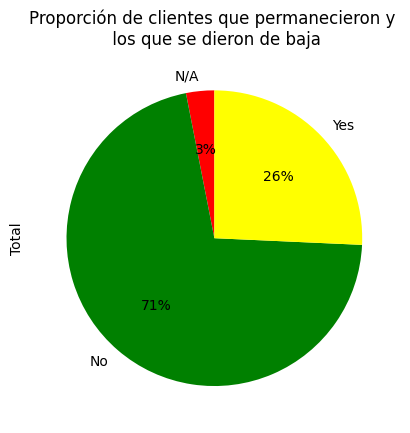

<Figure size 640x480 with 0 Axes>

In [17]:

df_telecom_analisis['Total'].plot(kind='pie', autopct='%1.f%%', startangle=90, colors=['red', 'green','yellow'])
plt.title('Proporción de clientes que permanecieron y \n los que se dieron de baja')
plt.show()

plt.savefig('grafico_churn.png', dpi=300, bbox_inches='tight')

In [20]:
cliente_evade = df_telecom.query('Churn == "Yes"')
cliente_evade

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.90
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.00
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.90
18,0022-TCJCI,Yes,Male,1,0,0,45,1,0,One year,...,Credit card (automatic),DSL,Yes,No,Yes,No,No,Yes,2791.50,62.70
19,0023-HGHWL,Yes,Male,1,0,0,1,0,0,Month-to-month,...,Electronic check,DSL,No,No,No,No,No,No,25.10,25.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Yes,Male,1,0,0,21,1,0,Month-to-month,...,Bank transfer (automatic),Fiber optic,No,No,Yes,No,Yes,Yes,2030.30,96.80
7246,9965-YOKZB,Yes,Male,1,0,0,9,1,1,Month-to-month,...,Electronic check,Fiber optic,No,No,No,No,No,Yes,790.15,83.85
7260,9985-MWVIX,Yes,Female,0,0,0,1,1,0,Month-to-month,...,Mailed check,Fiber optic,No,No,No,No,No,No,70.15,70.15
7261,9986-BONCE,Yes,Female,0,0,0,4,1,0,Month-to-month,...,Bank transfer (automatic),No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,85.50,20.95


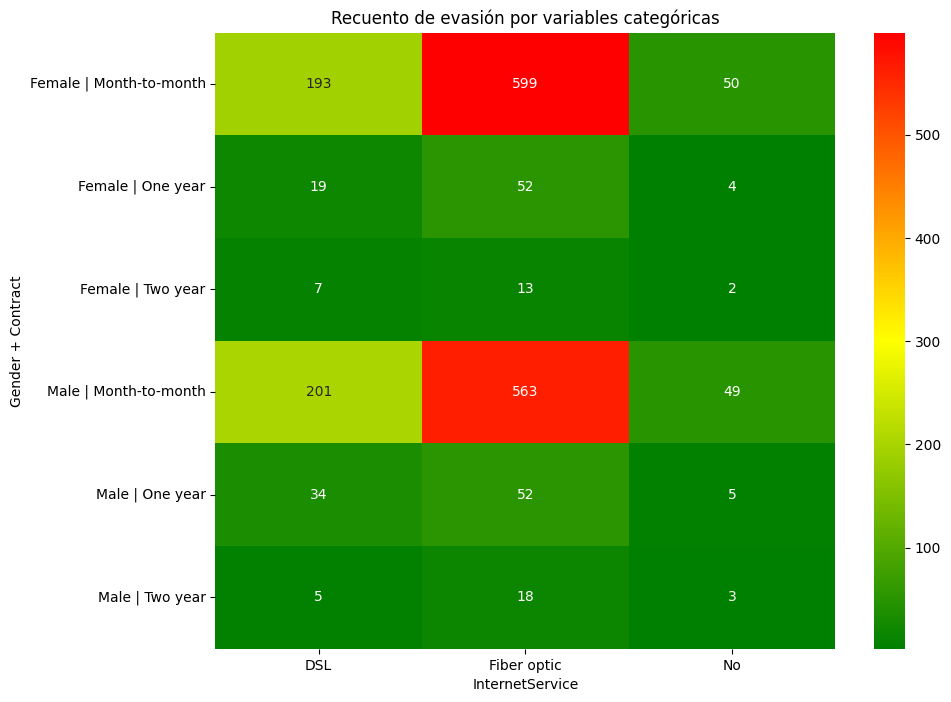

In [21]:
from matplotlib.colors import LinearSegmentedColormap
cliente_evade[['Gender','InternetService','Contract']].value_counts()
cliente_evade = cliente_evade.copy()

cliente_evade['Gender_Contract'] = cliente_evade['Gender'] + " | " + cliente_evade['Contract']

heatmap_data = cliente_evade.groupby(['Gender_Contract', 'InternetService']).size().unstack()

semaforo = LinearSegmentedColormap.from_list("semaforo", ["green", "yellow", "red"])

plt.figure(figsize=(10, 8))

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=semaforo)
plt.title('Recuento de evasión por variables categóricas')
plt.xlabel('InternetService')
plt.ylabel('Gender + Contract')
plt.show()


In [25]:
variables_numericas = [ 'Churn', 'ChargesMonthly', 'Tenure']

df_evasion_num = df_telecom[variables_numericas].sort_values('Churn').set_index('Churn')
df_evasion_num


,ChargesMonthly,Tenure
Churn,,
N/A,20.65,7
N/A,60.15,51
N/A,106.30,41
N/A,70.30,1
N/A,103.30,19
...,...,...
Yes,82.05,48
Yes,69.85,1
Yes,69.55,1


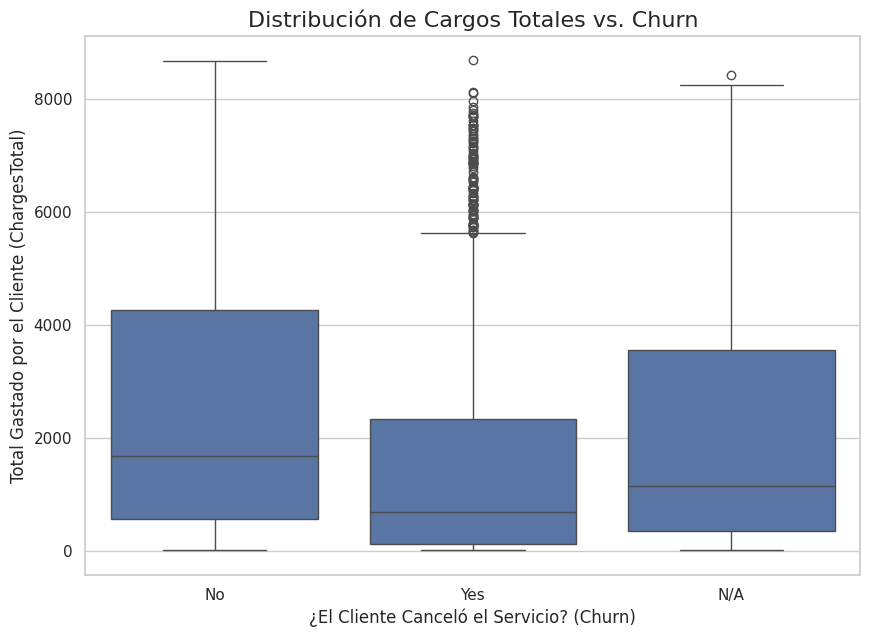

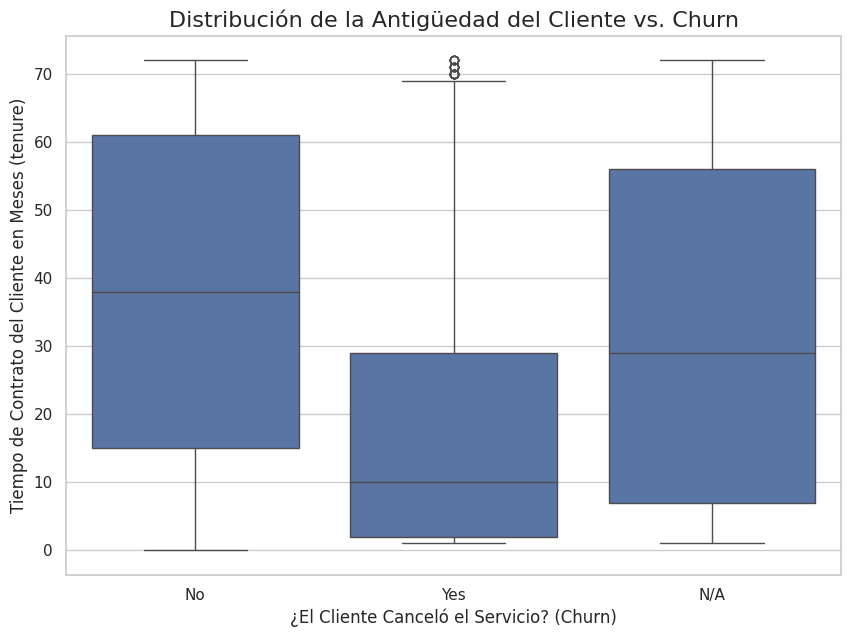

In [30]:
import seaborn as sns



sns.set_theme(style="whitegrid")


plt.figure(figsize=(10, 7))
sns.boxplot(
    x='Churn',
    y='ChargesTotal',
    data=df_telecom,
)
plt.title('Distribución de Cargos Totales vs. Churn', fontsize=16)
plt.xlabel('¿El Cliente Canceló el Servicio? (Churn)', fontsize=12)
plt.ylabel('Total Gastado por el Cliente (ChargesTotal)', fontsize=12)
plt.show()

plt.figure(figsize=(10, 7))
sns.boxplot(
    x='Churn',
    y='Tenure',
    data=df_telecom,
)
plt.title('Distribución de la Antigüedad del Cliente vs. Churn', fontsize=16)
plt.xlabel('¿El Cliente Canceló el Servicio? (Churn)', fontsize=12)
plt.ylabel('Tiempo de Contrato del Cliente en Meses (tenure)', fontsize=12)
plt.show()

#📄Informe final